---
title: Titanic Wrangling
formt: html
---

# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [33]:

# Import the titanic dataset here
!pip install pandas
!pip install numpy

In [34]:
import numpy as np
import pandas as pd

In [35]:
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [36]:
# Code here
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

df_titanic_passenger = df_titanic[df_titanic["type"] == "passenger"]


df_titanic_passenger.head()


,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger


In [37]:
crosstab= pd.crosstab(df_titanic_passenger["class"], df_titanic_passenger["embarked"], normalize=True)
crosstab

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [38]:
crosstab1= pd.crosstab(df_titanic_passenger["class"], df_titanic_passenger["embarked"], normalize="columns")
crosstab1

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


The table above shows the conditional probabilities based on the columns, in this case, where the passengers embarked

In [39]:
crosstab2= pd.crosstab(df_titanic_passenger["class"], df_titanic_passenger["embarked"], normalize="index")
crosstab2

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


The table above shows the conditional probabilities based on the index, in this case, the passengers class

From the table:


69.68% proportion of3rd class embarked on Southhampton

54.05% of Southhampton passengers are from 3rd class

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [40]:
!pip install plotnine


<Axes: xlabel='class'>

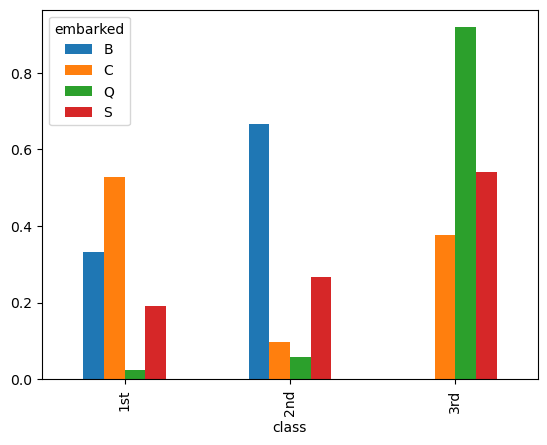

In [41]:
# Code here
crosstab1.plot(kind="bar")

A graph above is showing the conditional proabbility of class given where the passengers were embarked. The visual representation is better in showing the patterns and see differences of the proportions of the class within the each places where passengers embarked. It can easily highlght the highest and lowest classes, patterns and trends, therefore it provides ease in storytelling. It is also handeling 4 categories within small space without making it look confusing. But it does poor job in showing the exact numbers to do the calculations and see the exact percentages, therefore if we want to work with the numbers more, bar graph doesn't work well because it is less detailed. On the other hand, crosstab is quicker to switch between the rows, columns and overall proportions for calculations and is precise. 